* [1.DataOverview](#1.DataOverview)
* [2.Visualization](#2.Visualization)
    * [2.1&nbsp;Visualization&nbsp;for&nbsp;Driving&nbsp;Distance](#21)
    * [2.2&nbsp;Visualization&nbsp;for&nbsp;Total&nbsp;Eagles](#22)
    * [2.3&nbsp;Visualization&nbsp;for&nbsp;Aaron&nbsp;Baddeley](#23)
    * [2.4&nbsp;Visualization&nbsp;for&nbsp;Sungjae&nbsp;Im](#24)
    * [2.5&nbsp;Official&nbsp;World&nbsp;Golf&nbsp;Ranking](#25)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sns
import math
import datetime

In [2]:
os.listdir("../input/pga-tour-20102018-data/")

['PGA_Data_Historical.csv', '2019_data.csv']

# 1.DataOverview

This data size is 9,438,053. Variable of 'Player Name' and 'Value' have missing value 478 and 169,727 respectively.

Statistic have 378 types,including 'Driving Distance', 'Driving Accuracy Percentage','Greens in Regulation Percentage'...

In this data,I focus on the Statistic Driving Distance ,'Driving Accuracy Percentage','Total Eagles',and 'Total Birdies'.

Because I am not familiarized with Golf,if anyone have suggestion or other important variable about visualization. 

Please give me some comments.

In [3]:
data_2019=pd.read_csv("../input/pga-tour-20102018-data/2019_data.csv")
data_2019.head()

,Player Name,Date,Statistic,Variable,Value
0,Cameron Champ,2019-08-18,Driving Distance,Driving Distance - (ROUNDS),78
1,Rory McIlroy,2019-08-18,Driving Distance,Driving Distance - (ROUNDS),68
2,Luke List,2019-08-18,Driving Distance,Driving Distance - (ROUNDS),66
3,Wyndham Clark,2019-08-18,Driving Distance,Driving Distance - (ROUNDS),87
4,Dustin Johnson,2019-08-18,Driving Distance,Driving Distance - (ROUNDS),69


In [4]:
len(data_2019)

9438053

In [5]:
data_2019.isnull().sum()

Player Name       478
Date                0
Statistic           0
Variable            0
Value          169727
dtype: int64

In [6]:
data_2019['year']=data_2019.Date.apply(lambda x:x.split('-')[0])
data_2019['month']=data_2019.Date.apply(lambda x:x.split('-')[1])
data_2019['day']=data_2019.Date.apply(lambda x:x.split('-')[2])
data_2019.head()

,Player Name,Date,Statistic,Variable,Value,year,month,day
0,Cameron Champ,2019-08-18,Driving Distance,Driving Distance - (ROUNDS),78,2019,08,18
1,Rory McIlroy,2019-08-18,Driving Distance,Driving Distance - (ROUNDS),68,2019,08,18
2,Luke List,2019-08-18,Driving Distance,Driving Distance - (ROUNDS),66,2019,08,18
3,Wyndham Clark,2019-08-18,Driving Distance,Driving Distance - (ROUNDS),87,2019,08,18
4,Dustin Johnson,2019-08-18,Driving Distance,Driving Distance - (ROUNDS),69,2019,08,18


In [7]:
data_2019.Statistic.unique()

array(['Driving Distance', 'Driving Accuracy Percentage',
       'Greens in Regulation Percentage', 'Putting Average',
       'Par Breakers', 'Total Eagles', 'Total Birdies',
       'Scoring Average (Actual)', 'Official Money',
       'Sand Save Percentage', 'Par 3 Birdie or Better Leaders',
       'Par 4 Birdie or Better Leaders', 'Par 5 Birdie or Better Leaders',
       'Birdie or Better Conversion Percentage', 'Putts Per Round',
       'Scoring Average', 'All-Around Ranking', 'Total Driving',
       'Scrambling', 'Ryder Cup Points', 'PGA Championship Points',
       'Putts made Distance', 'Top 10 Finishes', 'Non-member Earnings',
       'Par 3 Scoring Average', 'Par 4 Scoring Average',
       'Par 5 Scoring Average', "3-Putt Avoidance - 15-20'",
       "3-Putt Avoidance - 20-25'", "3-Putt Avoidance > 25'",
       'Current Par or Better Streak', "Rounds in the 60's",
       'Money per Event Leaders', 'Eagles (Holes per)', 'Birdie Average',
       'Ball Striking', 'Longest Drives', 'B

In [8]:
type_stat=pd.DataFrame({'type':data_2019.Statistic.value_counts().sort_values(ascending=False)[:10].index,'value':data_2019.Statistic.value_counts().sort_values(ascending=False)[:10].values})
type_stat

,type,value
0,Official World Golf Ranking,175182
1,Consecutive GIR,88854
2,Consecutive Sand Saves,82824
3,Lowest Round,59236
4,Consecutive Fairways Hit,44427
5,Best YTD Streak w/o a 3-Putt,44427
6,FedExCup Season Points,43482
7,FedExCup Standings,43482
8,% of Potential Pts won - FedExCup Regular Season,43482
9,Percentage of potential money won,41604


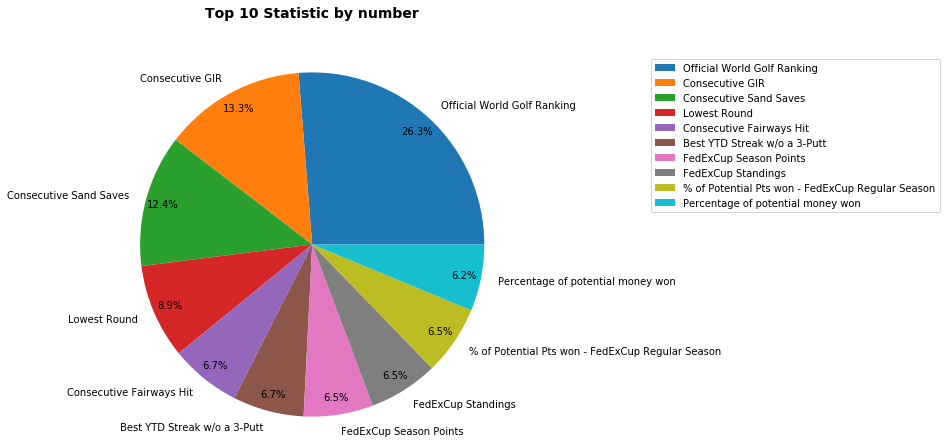

In [9]:

qx = type_stat.plot(kind='pie', figsize=(10,7), y='value', labels=list(type_stat.type),autopct='%1.1f%%', pctdistance=0.9, radius=1.2)
plt.legend(loc=0, bbox_to_anchor=(1.10,1.0)) 
plt.title('Top 10 Statistic by number', weight='bold', size=14,y=1.08)
plt.axis('equal')
plt.ylabel('')
plt.show()
plt.clf()
plt.close()

# 2.Visualization

<h3 id="21">2.1&nbsp;Visualization&nbsp;for&nbsp;Driving&nbsp;Distance</h3>

Text(0, 0.5, '')

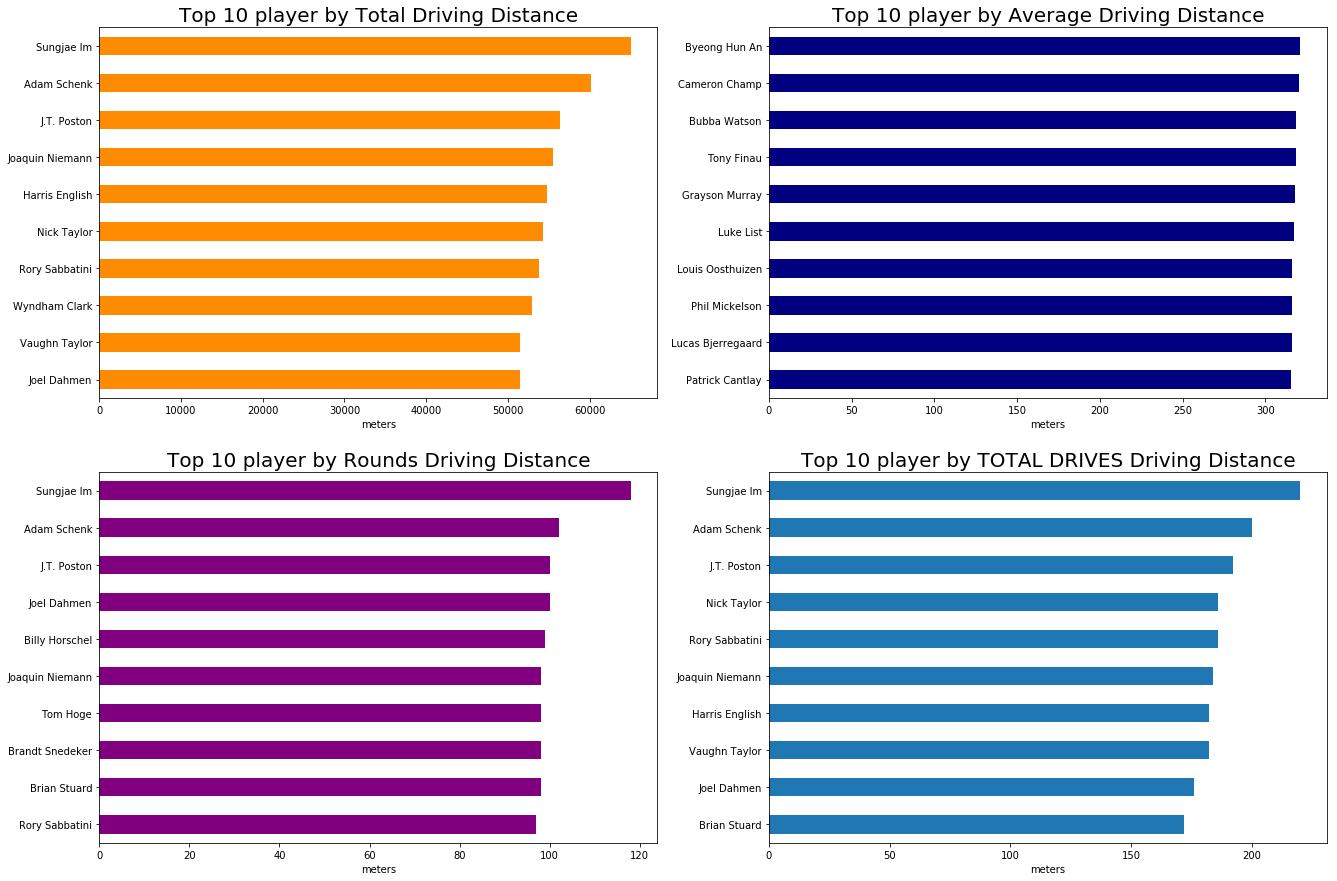

In [10]:
DD=data_2019[data_2019.Variable=='Driving Distance - (TOTAL DISTANCE)'].iloc[:,[0,4]]
DD['Value_new']=DD['Value'].apply(lambda x:''.join(x.split(',')))
DD.Value_new=DD.Value_new.astype(int)
DD=DD.drop(columns='Value')
plt.figure(figsize=(22,15))
plt.subplot(2,2,1)
DD.groupby('Player Name')['Value_new'].max().sort_values(ascending=False)[:10].sort_values().plot.barh(color='darkorange')
plt.title("Top 10 player by Total Driving Distance",size=20)
plt.xlabel('meters')
plt.ylabel('')
plt.subplot(2,2,2)
DD=data_2019[data_2019.Variable=='Driving Distance - (AVG.)'].iloc[:,[0,4]]
DD.Value=DD.Value.astype(float)
DD.groupby('Player Name')['Value'].max().sort_values(ascending=False)[:10].sort_values().plot.barh(color='navy')
plt.title("Top 10 player by Average Driving Distance",size=20)
plt.xlabel('meters')
plt.ylabel('')
plt.subplot(2,2,3)
DD=data_2019[data_2019.Variable=='Driving Distance - (ROUNDS)'].iloc[:,[0,4]]
DD.Value=DD.Value.astype(float)
DD.groupby('Player Name')['Value'].max().sort_values(ascending=False)[:10].sort_values().plot.barh(color='purple')
plt.title("Top 10 player by Rounds Driving Distance",size=20)
plt.xlabel('meters')
plt.ylabel('')
plt.subplot(2,2,4)
DD=data_2019[data_2019.Variable=='Driving Distance - (TOTAL DRIVES)'].iloc[:,[0,4]]
DD.Value=DD.Value.astype(float)
DD.groupby('Player Name')['Value'].max().sort_values(ascending=False)[:10].sort_values().plot.barh()
plt.title("Top 10 player by TOTAL DRIVES Driving Distance",size=20)
plt.xlabel('meters')
plt.ylabel('')


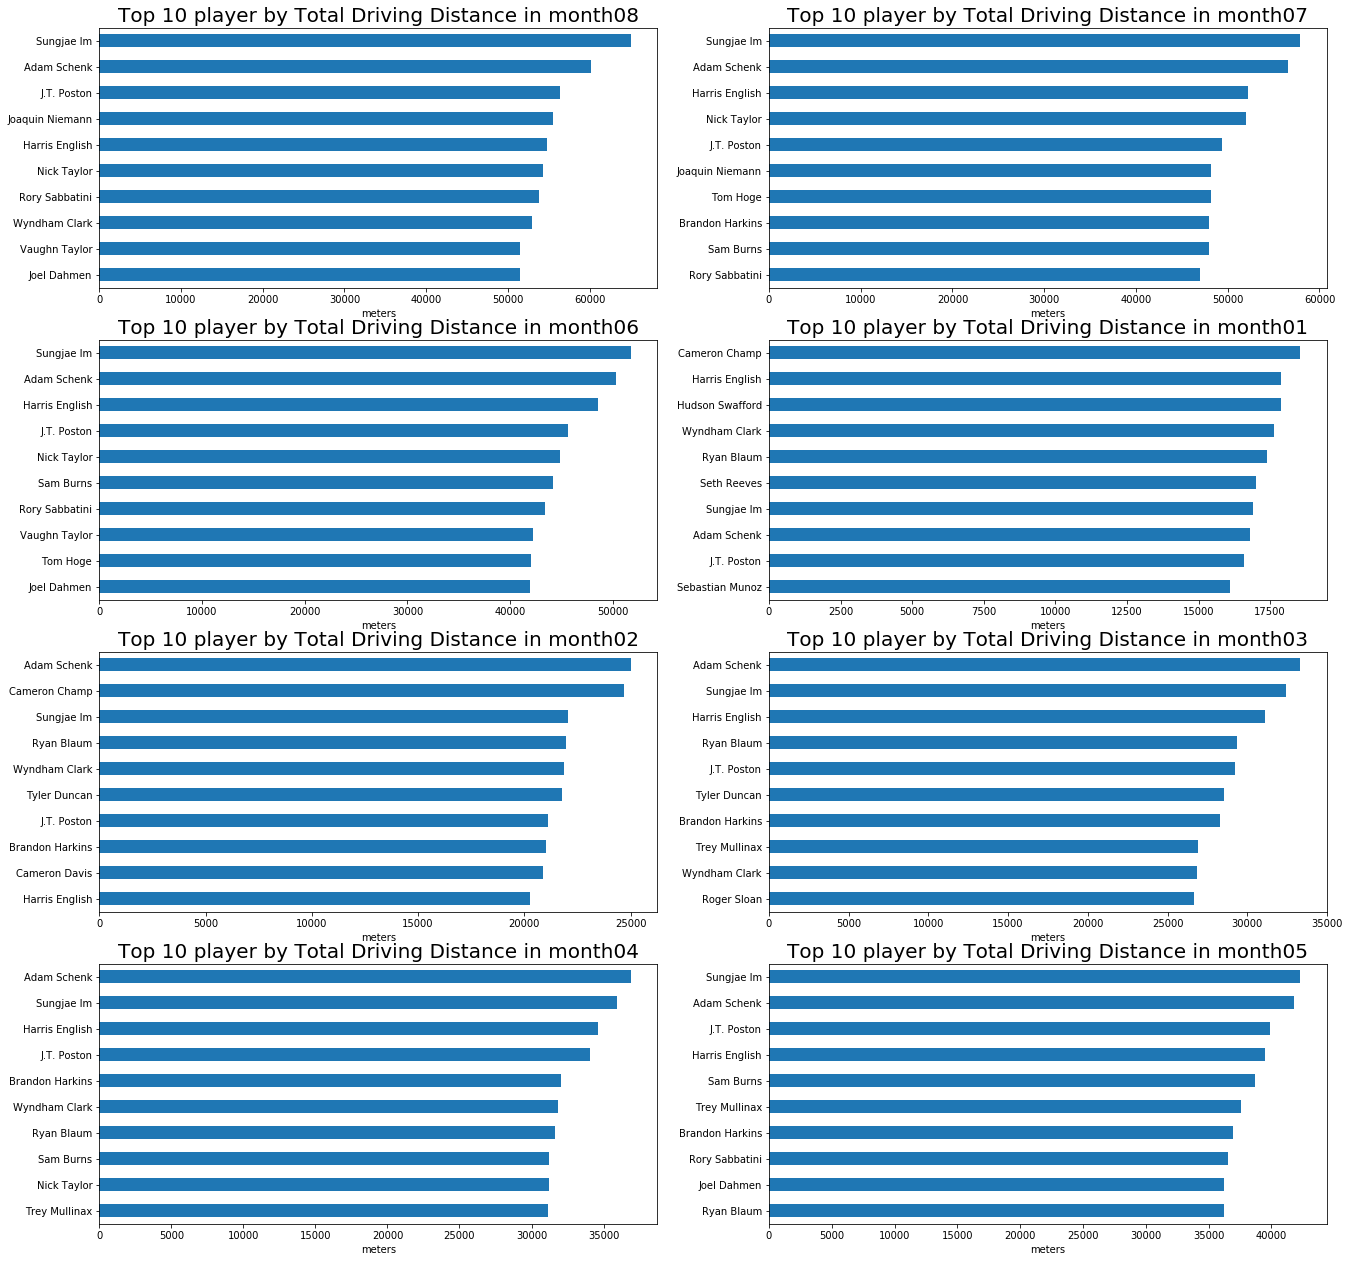

In [11]:
DD=data_2019[data_2019.Variable=='Driving Distance - (TOTAL DISTANCE)'].iloc[:,[0,4,6]]
DD['Value_new']=DD['Value'].apply(lambda x:''.join(x.split(',')))
DD.Value_new=DD.Value_new.astype(int)
DD=DD.drop(columns='Value')
plt.figure(figsize=(22,22))
for i in range(len(DD.month.unique())):
    DD_month=DD[DD.month==DD.month.unique()[i]]
    plt.subplot(4,2,i+1)
    DD_month.groupby('Player Name')['Value_new'].max().sort_values(ascending=False)[:10].sort_values().plot(kind='barh')
    plt.title("Top 10 player by Total Driving Distance in month"+DD.month.unique()[i],size=20)
    plt.xlabel('meters')
    plt.ylabel('')

<h3 id="22">2.2&nbsp;Visualization&nbsp;for&nbsp;Total&nbsp;Eagles</h3>

Text(0, 0.5, '')

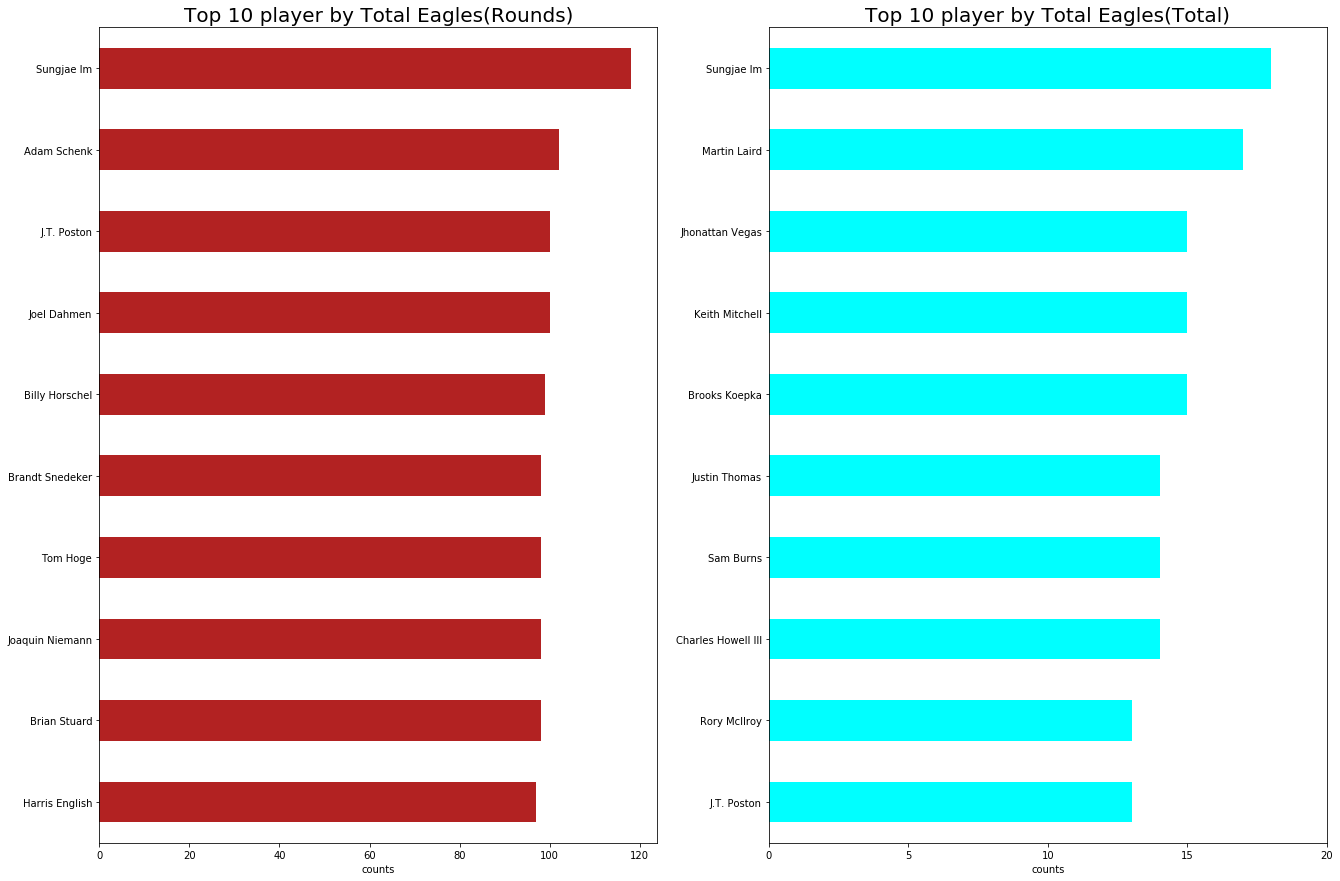

In [12]:
TE=data_2019[data_2019.Variable=='Total Eagles - (ROUNDS)'].iloc[:,[0,4]]
plt.figure(figsize=(22,15))

plt.subplot(1,2,1)
TE.Value=TE.Value.astype(int)
TE.groupby('Player Name')['Value'].max().sort_values(ascending=False)[:10].sort_values().plot.barh(color='firebrick')
plt.title("Top 10 player by Total Eagles(Rounds)",size=20)
plt.xlabel('counts')
plt.ylabel('')

plt.subplot(1,2,2)
TE=data_2019[data_2019.Variable=='Total Eagles - (TOTAL)'].iloc[:,[0,4]]
TE=TE.dropna(subset=['Value'])
TE.Value=TE.Value.astype(int)
TE.groupby('Player Name')['Value'].max().sort_values(ascending=False)[:10].sort_values().plot.barh(color='cyan')
plt.xticks(np.linspace(0, 20, 5))
plt.title("Top 10 player by Total Eagles(Total)",size=20)
plt.xlabel('counts')
plt.ylabel('')



In [13]:
def TOTAvgRank_DD_DAP_TE_TB(player,month):
    Ranktype=['Driving Distance - (TOTAL DRIVES)','Driving Accuracy Percentage - (%)','Total Eagles - (TOTAL)','Total Birdies - (TOTAL)']
    B={}
    for i in range(len(Ranktype)):
        A=data_2019[data_2019.Variable==Ranktype[i]]
        A=A[A.month==month]
        A.dropna(subset=['Value'])
        A.Value=A.Value.astype(float)
        value=A.groupby(['Player Name'])['Value'].agg('mean')
        rank=A.groupby(['Player Name'])['Value'].agg('mean').rank(method='min',ascending=False)
        new=pd.DataFrame({'rank':rank,'value':value})
        B['type'+str(i)]=str(Ranktype[i])
        B['rank'+str(i)]=str(new[new.index==player].iloc[0,0])+"/"+str(max(rank))
        B['value'+str(i)]=str(new[new.index==player].iloc[0,1])

    return B


<h3 id="23">2.3&nbsp;Visualization&nbsp;for&nbsp;Aaron&nbsp;Baddeley</h3>


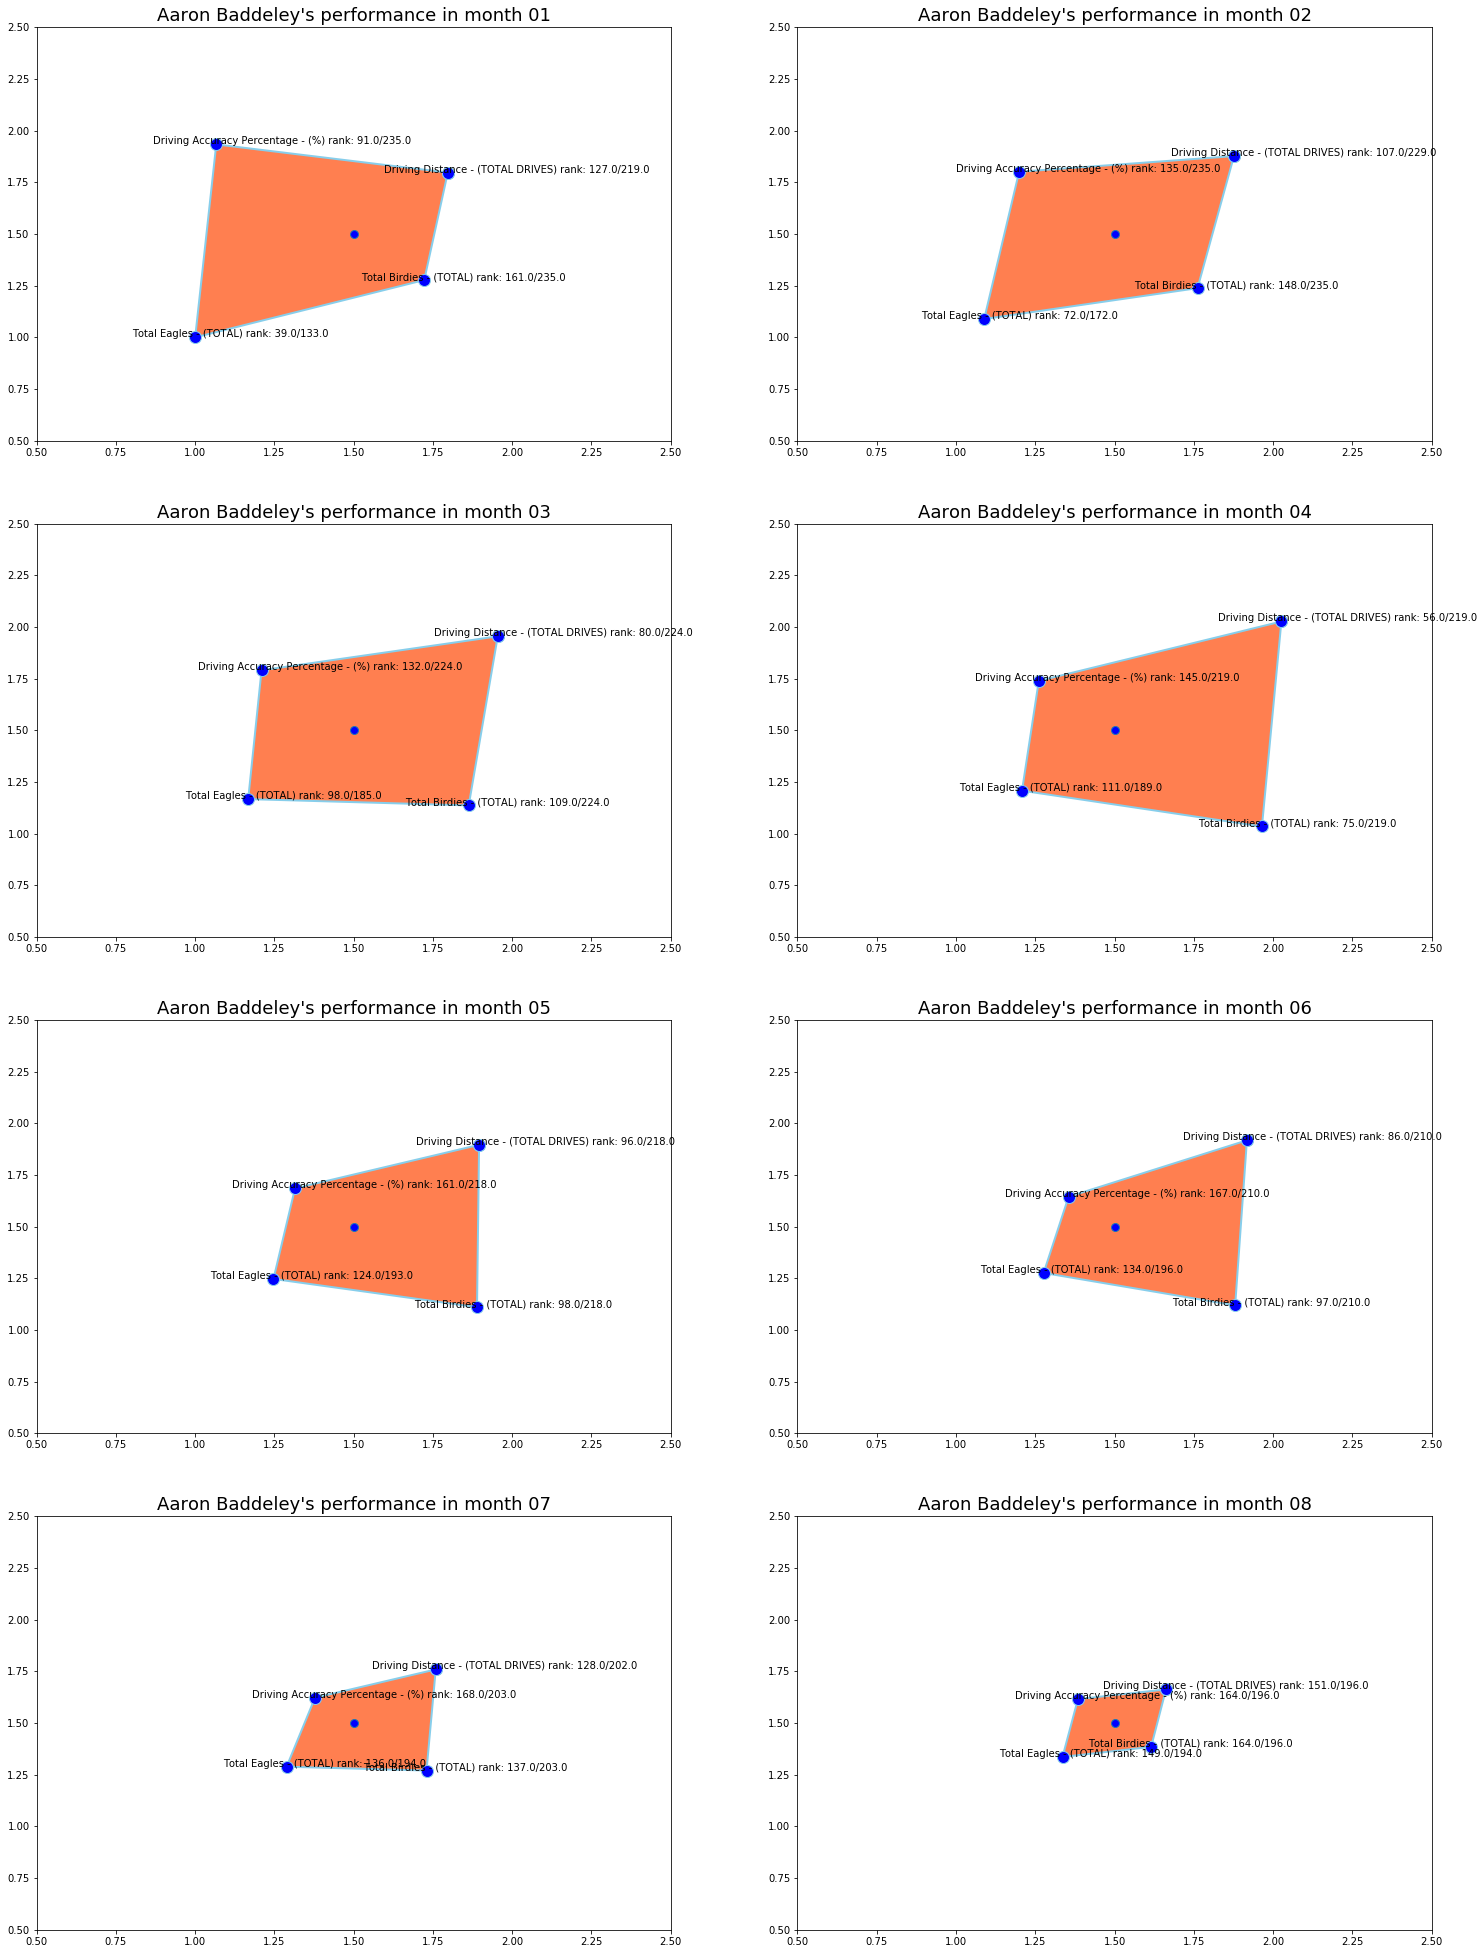

In [14]:
plt.figure(figsize=(25,35))
j=1
for k in ['01','02','03','04','05','06','07','08']:
    Aaron=TOTAvgRank_DD_DAP_TE_TB('Aaron Baddeley',str(k))
    y=[]
    x=[]
    n=[]
    for i in range(4):
        r1,r2=Aaron['rank'+str(i)].split('/')
        R=float(r1)/float(r2)
        R=1-R
        y.append(1.5+R*math.sin(math.pi/4+i*math.pi/2))
        x.append(1.5+R*math.cos(math.pi/4+i*math.pi/2))
        n.append(Aaron['type'+str(i)]+" rank: "+Aaron['rank'+str(i)])

    x.append(x[0])
    y.append(y[0])
    plt.subplot(4,2,j)
    plt.plot(x,y, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
    for i, txt in enumerate(n):
        plt.annotate(txt, (x[i]-0.2, y[i]))
    plt.xlim(0.5,2.5)
    plt.ylim(0.5,2.5)
    plt.fill(x, y,"coral")
    plt.plot( 1.5, 1.5, marker='o', markerfacecolor='blue', markersize=8, linewidth=2)
    plt.title("Aaron Baddeley's performance in month "+str(k),size=18)
    j+=1

<h3 id="24">2.4&nbsp;Visualization&nbsp;for&nbsp;Sungjae&nbsp;Im</h3>

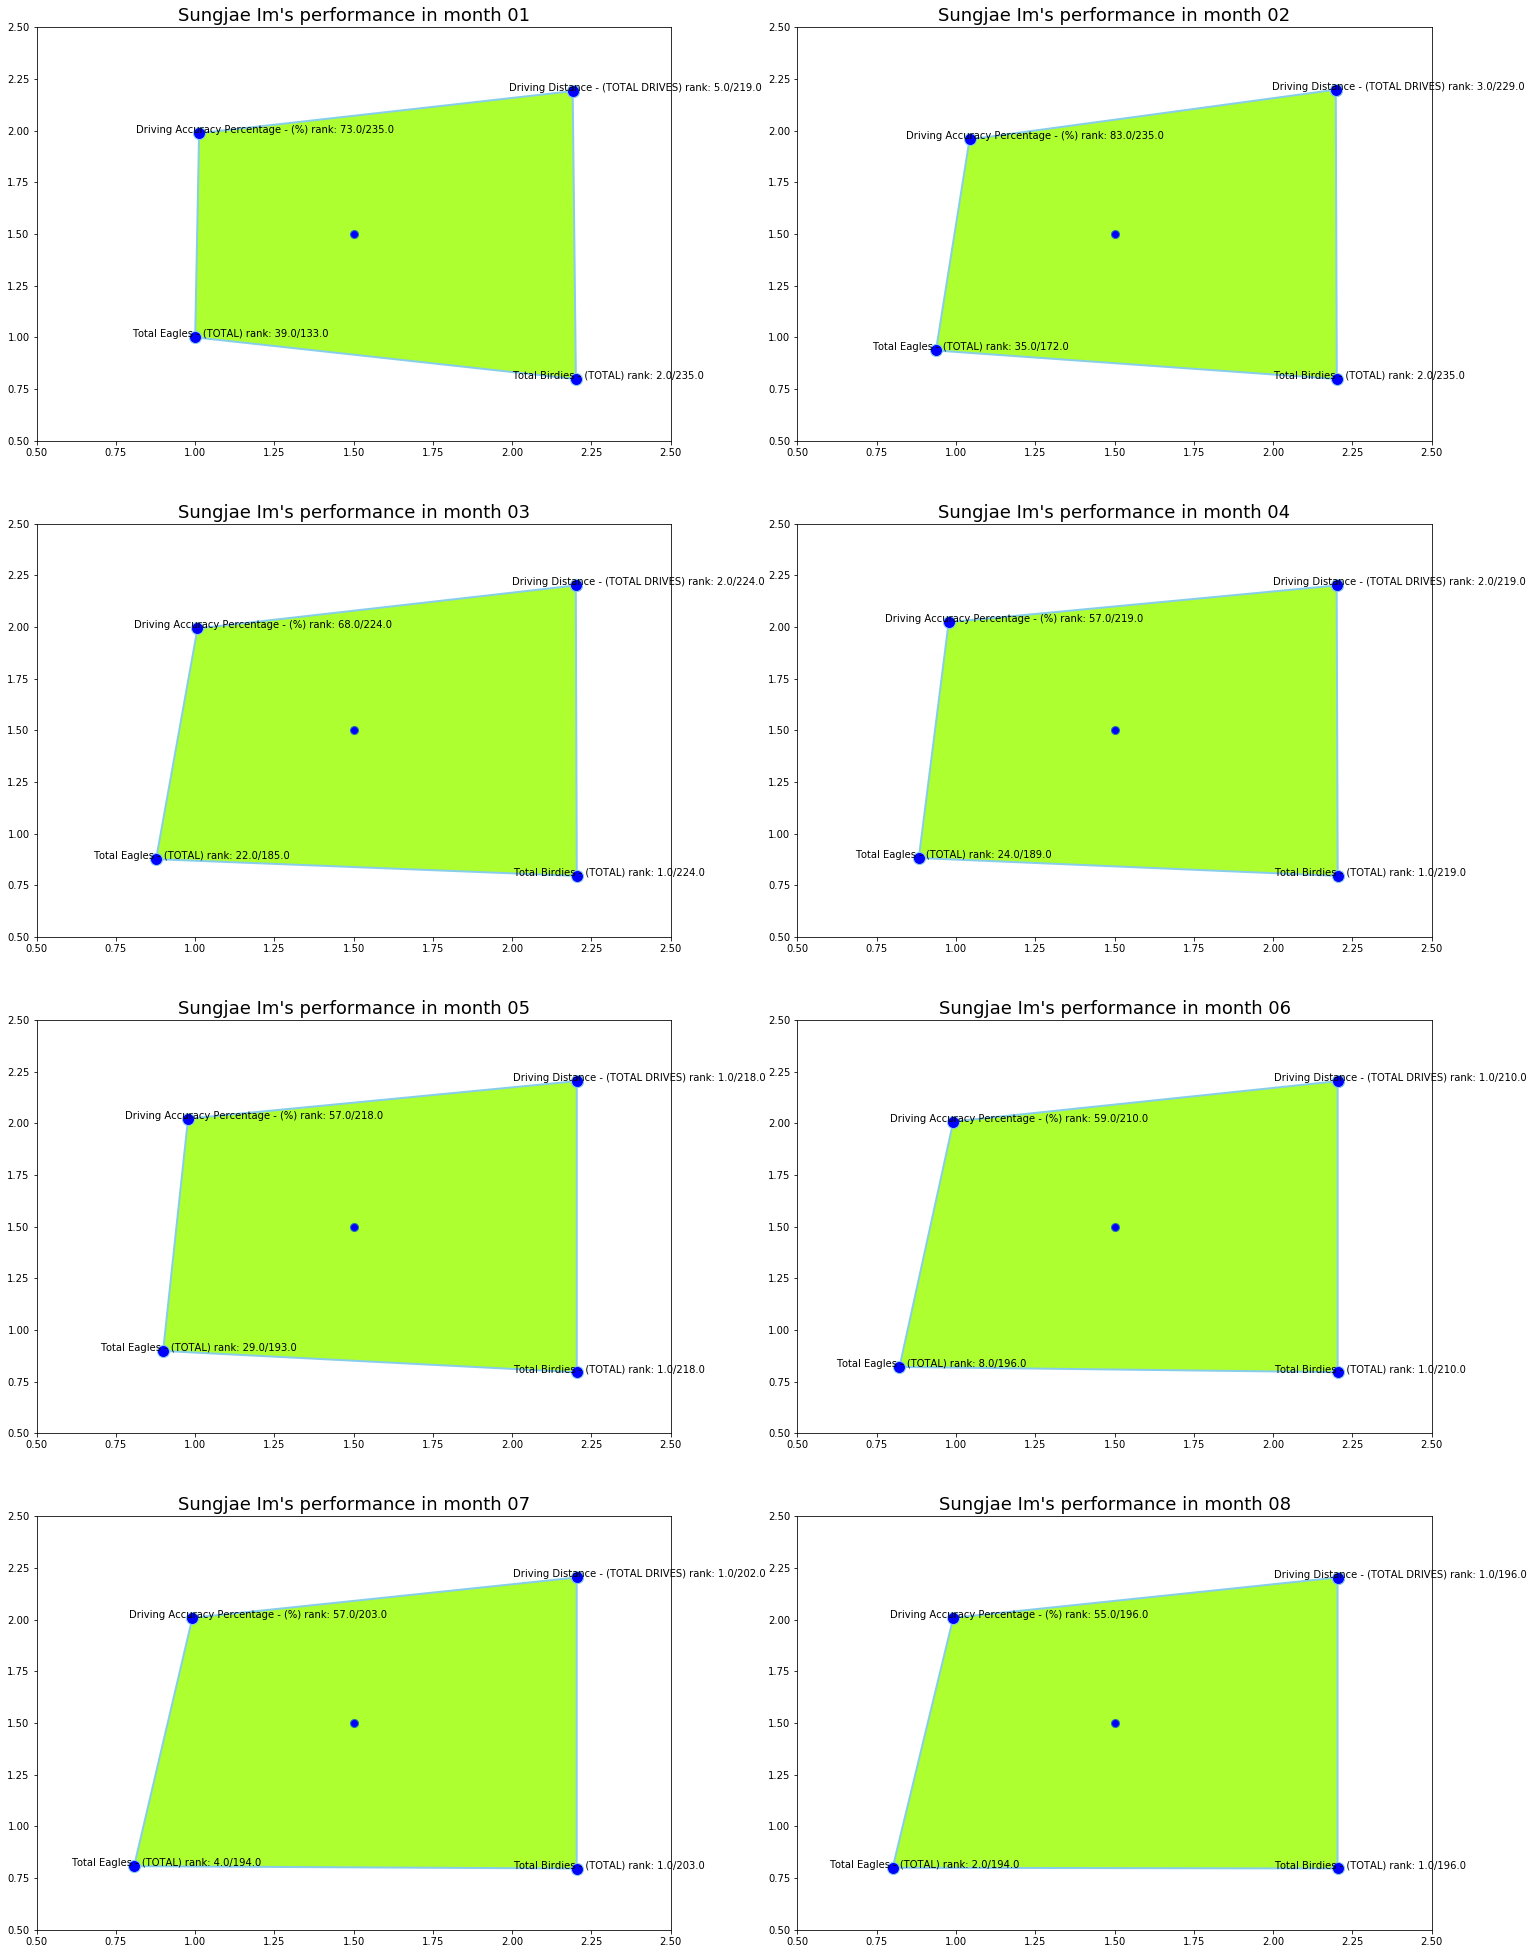

In [15]:
plt.figure(figsize=(25,35))
j=1
for k in ['01','02','03','04','05','06','07','08']:
    Sungjae=TOTAvgRank_DD_DAP_TE_TB('Sungjae Im',str(k))
    y=[]
    x=[]
    n=[]
    for i in range(4):
        r1,r2=Sungjae['rank'+str(i)].split('/')
        R=float(r1)/float(r2)
        R=1-R
        y.append(1.5+R*math.sin(math.pi/4+i*math.pi/2))
        x.append(1.5+R*math.cos(math.pi/4+i*math.pi/2))
        n.append(Sungjae['type'+str(i)]+" rank: "+Sungjae['rank'+str(i)])

    x.append(x[0])
    y.append(y[0])
    plt.subplot(4,2,j)
    plt.plot(x,y, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
    for i, txt in enumerate(n):
        plt.annotate(txt, (x[i]-0.2, y[i]))
    plt.xlim(0.5,2.5)
    plt.ylim(0.5,2.5)
    plt.fill(x, y,"greenyellow")
    plt.plot( 1.5, 1.5, marker='o', markerfacecolor='blue', markersize=8, linewidth=2)
    plt.title("Sungjae Im's performance in month "+str(k),size=18)
    j+=1

<h3 id="25">2.5&nbsp;Official&nbsp;World&nbsp;Golf&nbsp;Ranking</h3>

In [16]:
data_2019[data_2019.Statistic=='Official World Golf Ranking'].Variable.unique()

array(['Official World Golf Ranking - (EVENTS)',
       'Official World Golf Ranking - (AVG POINTS)',
       'Official World Golf Ranking - (TOTAL POINTS)',
       'Official World Golf Ranking - (POINTS LOST)',
       'Official World Golf Ranking - (POINTS GAINED)',
       'Official World Golf Ranking - (COUNTRY)'], dtype=object)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


([<matplotlib.axis.XTick at 0x7fb3462fb7f0>,
 <a list of 7 Text xticklabel objects>)

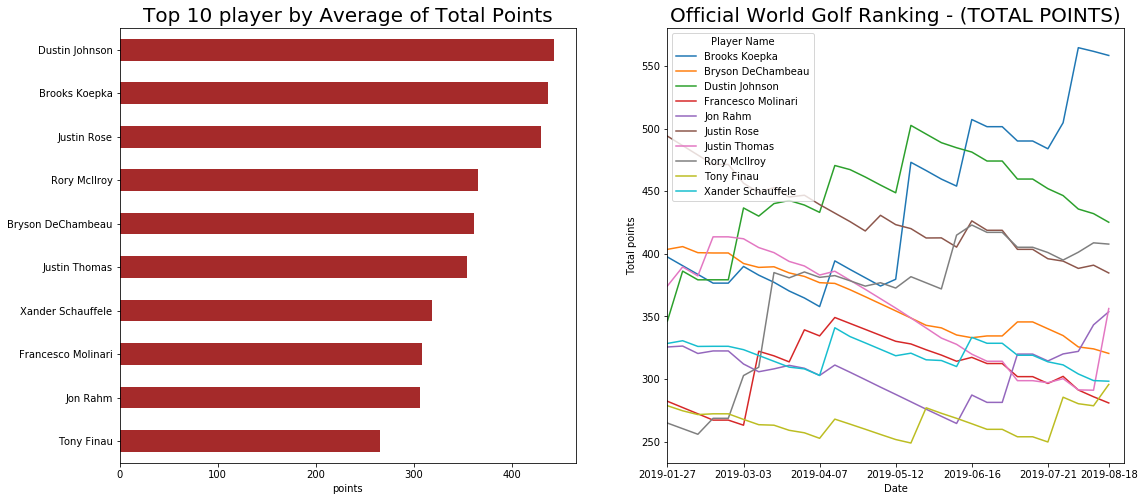

In [17]:
OWGR_TP=data_2019[data_2019.Variable=='Official World Golf Ranking - (TOTAL POINTS)']
OWGR_TP.Value=OWGR_TP.Value.astype(float)

fig, axes = plt.subplots(1, 2,figsize=(18,8))

OWGR_TP.groupby('Player Name')['Value'].mean().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color='brown',ax=axes[0])
axes[0].set_title('Top 10 player by Average of Total Points',size=20)
axes[0].set_xlabel('points')
axes[0].set_ylabel('')

OWGE_TP10=OWGR_TP[OWGR_TP['Player Name'].isin(list(OWGR_TP.groupby('Player Name')['Value'].mean().sort_values(ascending=False)[:10].index[:10]))]
OWGE_TP10.groupby(['Player Name','Date'])['Value'].agg('mean').unstack('Player Name').plot(ax=axes[1])
axes[1].set_title('Official World Golf Ranking - (TOTAL POINTS)',size=20)
axes[1].set_ylabel('Total points')
axes[1].set_xlim([0,30])
plt.xticks([0,5,10,15,20,25,29], ['2019-01-27','2019-03-03','2019-04-07','2019-05-12','2019-06-16','2019-07-21','2019-08-18'], rotation=0)